In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Analyse des données
### Analyse univariée

Maintenant que nos données sont nettoyées, nous allons les analyser.
La variable quantitative intéressante que nous pouvons analyser ici est le `nutriscore-score` puisqu'il va s'agir du fer de lance de notre application.

In [2]:
df = pd.read_csv("cleaned_openfoodfacts_dataset.csv", delimiter=";", index_col=0, low_memory=False)

In [3]:
nutriscore_score_series = df['nutriscore_score']
mean = nutriscore_score_series.mean()
maximum = nutriscore_score_series.max()
minimum = nutriscore_score_series.min()
median = nutriscore_score_series.median()
mode = nutriscore_score_series.mode()
q1, q3 = np.percentile(nutriscore_score_series, [25, 75])

print(f"Le nutriscore maximum / le plus mauvais est de : {maximum}.")
print(f"Le nutriscore mini / le meilleur est de : {minimum}.")
print(f"Le nutriscore median des produits vendus en France est de : {median}")
print(f"Le nutriscore moyen des produits vendus en France est de : {mean}")
print(f"Le nutriscore modal des produits vendus en France est de : {mode}")

Le nutriscore maximum / le plus mauvais est de : 40.0.
Le nutriscore mini / le meilleur est de : -15.0.
Le nutriscore median des produits vendus en France est de : 11.0
Le nutriscore moyen des produits vendus en France est de : 10.290159737821272
Le nutriscore modal des produits vendus en France est de : 0    14.0
Name: nutriscore_score, dtype: float64


#### Indicateurs classiques
Ici, avec la médiane et la moyenne, nous pouvons conclure que les produits vendus en France ont un nutriscore **C** lorsque remis en lettre, voire **E** lorsqu'il s'agit de boissons. Regardons maintenant la distribution afin d'avoir une meilleure idée.

#### Répartition

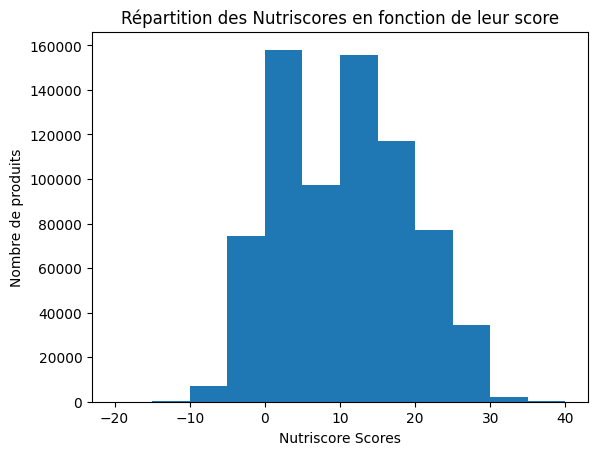

In [4]:
ranges = range(-20, 45, 5)

plt.hist(nutriscore_score_series, bins=ranges)

plt.xlabel("Nutriscore Scores")
plt.ylabel("Nombre de produits")
plt.title("Répartition des Nutriscores en fonction de leur score")

plt.show()

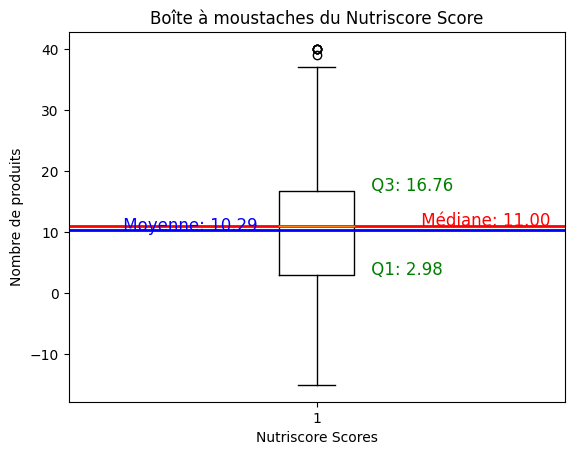

In [5]:
fig, ax = plt.subplots()
ax.boxplot(nutriscore_score_series)

# Ajout de labels et du titre
ax.set_xlabel("Nutriscore Scores")
ax.set_ylabel("Nombre de produits")
ax.set_title("Boîte à moustaches du Nutriscore Score")

ax.axhline(median, color='r', linestyle='-', linewidth=2)
ax.axhline(mean, color='b', linestyle='-', linewidth=2)

# Ajout des valeurs au graphique
ax.text(1.2, median, " Médiane: {:.2f}".format(median), color='r', fontsize=12)
ax.text(1.1, q1, " Q1: {:.2f}".format(q1), color='g', fontsize=12)
ax.text(1.1, q3, " Q3: {:.2f}".format(q3), color='g', fontsize=12)
ax.text(0.6, mean, " Moyenne: {:.2f}".format(mean), color='b', fontsize=12)




# Affichage de la boîte à moustaches
plt.show()

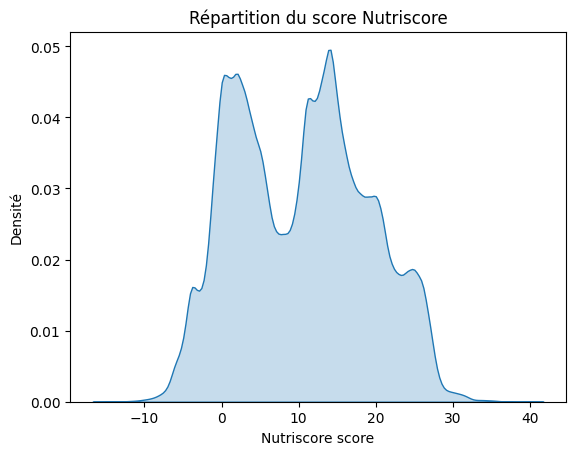

In [6]:
sns.kdeplot(nutriscore_score_series, fill=True)

plt.xlabel("Nutriscore score")
plt.ylabel("Densité")
plt.title("Répartition du score Nutriscore")

# Affichage du graphique de densité
plt.show()

Contrairement à ce que nous aurions pu penser, nous n'avons pas une concentration de la quantité de produits à la médiane, ni à la moyenne, mais plutôt deux concentrations qui sont quasi équivalentes sur des valeurs entre 0 et 10 puis entre 10 et 20.

### Analyse bivariée
#### Relation entre le nutriscore et la teneur en sucre

Dans le cadre de notre application, nous voulons pouvoir montrer les meilleurs ingrédients à nos clients lorsqu'ils vont entrer une recherche.\
Il est de notoriété publique de dire que les aliments qui contiennent beaucoup de sucre ne sont pas bons pour la santé, nous allons essayer de la vérifier en faisant une analyse bivariée.\
Normalement, la corrélation devrait apparaître, plus un produit contient du sucre, moins il est bon pour la santé, donc a un `nutriscore-score` élevé.

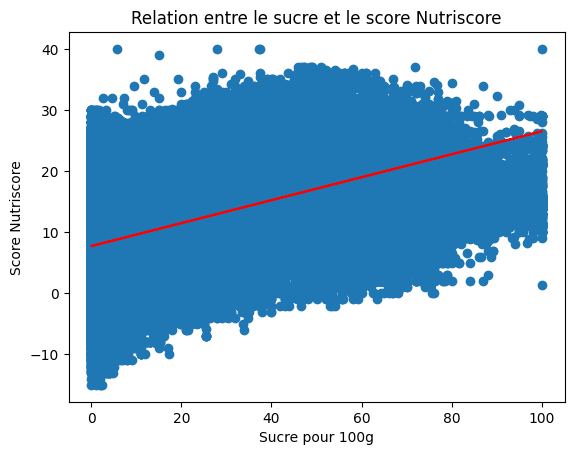

La covariance est de : 74.59, cela veut dire qu'elles sont liées. Si le nutriscore se dégrade/augmente, la teneur en sucres augmente, et inversement. N'ayant pas d'unité, celle-ci est peu significative. Nous regarderons donc la corrélation de Pearson.
La corrélation de pearson est de 0.44, une correlation existe entre le sucre et l'augmentation/dégradation du nutriscore.


In [7]:
plt.scatter(df['sugars_100g'], df['nutriscore_score'])

plt.xlabel("Sucre pour 100g")
plt.ylabel("Score Nutriscore")
plt.title("Relation entre le sucre et le score Nutriscore")

# Droite de régression
coefficients = np.polyfit(df['sugars_100g'], df['nutriscore_score'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df['sugars_100g']
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()

covariance = df['sugars_100g'].cov(df['nutriscore_score'])
corr_matrix = df[['sugars_100g', 'nutriscore_score']].corr()
pearson_coef = corr_matrix.iloc[0,1]
print(f"La covariance est de : {round(covariance,2)}, cela veut dire qu'elles sont liées. Si le nutriscore se dégrade/augmente, la teneur en sucres augmente, et inversement. N'ayant pas d'unité, celle-ci est peu significative. Nous regarderons donc la corrélation de Pearson.")
print(f"La corrélation de pearson est de {round(pearson_coef,2)}, une correlation existe entre le sucre et l'augmentation/dégradation du nutriscore.")

#### Relation entre le nutriscore et la teneur en kcal
Idem qu'au-dessus, il serait plutôt logique, bien peut-être qu'un peu moins, qu'un aliment contenant beaucoup de calories ait un `nutriscore-score` élevé.

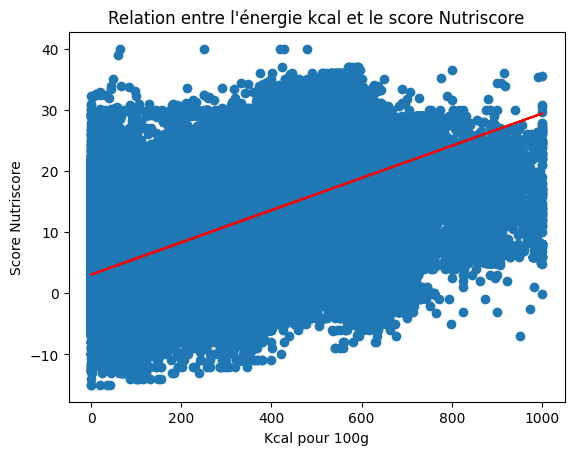

La covariance est de : 945.16, cela veut dire qu'elles sont liées. Mais idem que précédemment, pas d'unité, alors il est difficile de pouvoir juger.
La corrélation de pearson est de 0.58, ce qui est encore plus que pour la relation sucre/nutriscore. Plus un produit est calorique, plus son nutriscore est haut.


In [8]:
plt.scatter(df['energy-kcal_100g'], df['nutriscore_score'])

plt.xlabel("Kcal pour 100g")
plt.ylabel("Score Nutriscore")
plt.title("Relation entre l'énergie kcal et le score Nutriscore")

# Droite de régression
coefficients = np.polyfit(df['energy-kcal_100g'], df['nutriscore_score'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df["energy-kcal_100g"]
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()
covariance = df['energy-kcal_100g'].cov(df['nutriscore_score'])
corr_matrix = df[['energy-kcal_100g', 'nutriscore_score']].corr()
pearson_coef = corr_matrix.iloc[0,1]
print(f"La covariance est de : {round(covariance,2)}, cela veut dire qu'elles sont liées. Mais idem que précédemment, pas d'unité, alors il est difficile de pouvoir juger.")
print(f"La corrélation de pearson est de {round(pearson_coef,2)}, ce qui est encore plus que pour la relation sucre/nutriscore. Plus un produit est calorique, plus son nutriscore est haut.")

#### Relation entre les fibres et la teneur en kcal

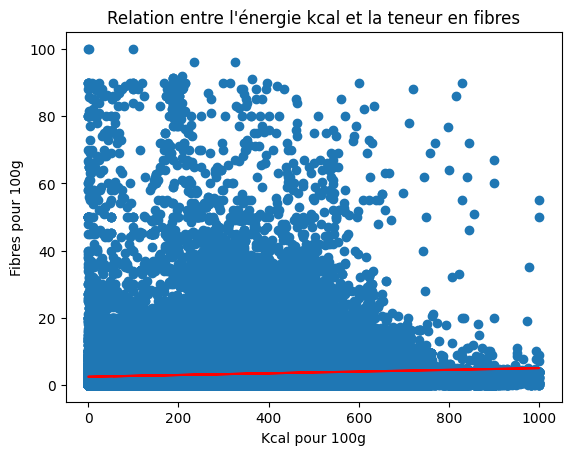

La covariance est de : 91.82, un chiffre bien plus petit que le précédent, mais qui peut encore une fois induire en erreur.
La corrélation de pearson est de 0.1440210119442618 montre ici qu'il y a une faible corrélation etre le nombre de kcal d'un produit et sa teneur en fibres.


In [9]:
plt.scatter(df['energy-kcal_100g'], df['fiber_100g'])

plt.xlabel("Kcal pour 100g")
plt.ylabel("Fibres pour 100g")
plt.title("Relation entre l'énergie kcal et la teneur en fibres")

# Droite de régression
coefficients = np.polyfit(df['energy-kcal_100g'], df['fiber_100g'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df["energy-kcal_100g"]
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()
covariance = df['energy-kcal_100g'].cov(df['fiber_100g'])
corr_matrix = df[['energy-kcal_100g', 'fiber_100g']].corr()
pearson_coef = corr_matrix.iloc[0,1]

print(f"La covariance est de : {round(covariance,2)}, un chiffre bien plus petit que le précédent, mais qui peut encore une fois induire en erreur.")
print(f"La corrélation de pearson est de {pearson_coef} montre ici qu'il y a une faible corrélation etre le nombre de kcal d'un produit et sa teneur en fibres.")

### Tableau de contingence entre Catégories et Nutriscore

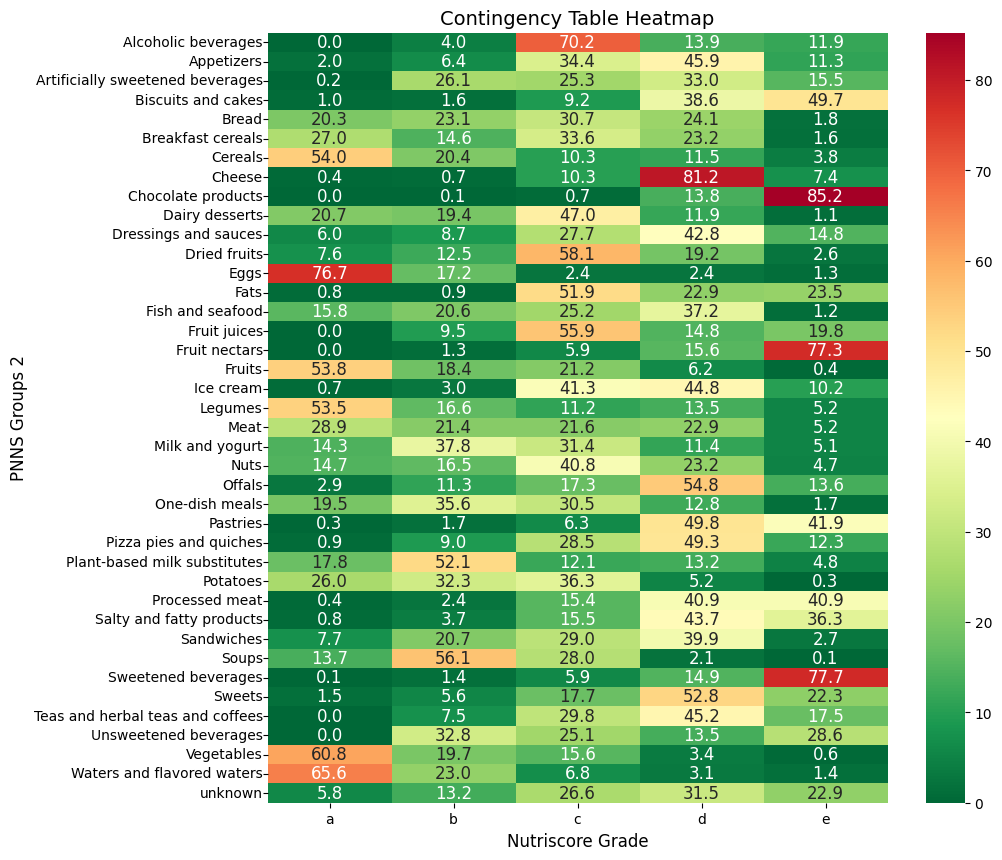

In [10]:
# You can use the crosstab() method to create the contingency table
contingency_table = pd.crosstab(df['pnns_groups_2'], df['nutriscore_grade'], normalize='index') *100

# Display the contingency table
contingency_table

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(contingency_table, cmap="RdYlGn_r", annot=True, fmt=".1f", annot_kws={'fontsize': 12}, ax=ax)
ax.set_xlabel('Nutriscore Grade', fontsize=12)
ax.set_ylabel('PNNS Groups 2', fontsize=12)
ax.set_title('Contingency Table Heatmap', fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.tick_params(axis='y', which='major', pad=0)
plt.show()

# Afficher la quantité en face ou à côté du %

Ce tableau de contingence nous fait apparaître une belle distribution dans la catégorie `Meat`, les viandes. \
Nous allons effectuer une analyse plus fine sur cette catégorie pour regarder les différents indicateurs en fonction de la lettre du nutriscore.

### Analyse fine d'un groupe : Meats - Viandes
#### Indicateurs basiques

Nombre de produits par nutriscore


,nutriscore_grade,count
0,a,5134
1,d,4065
2,c,3832
3,b,3809
4,e,933


Moyenne des valeurs nutritionnelles + le nutriscore_score pour la viande.


,nutriscore_score,fiber_100g,proteins_100g,energy-kcal_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
0,4.35435,0.672236,20.116623,181.089903,0.772728,8.900662,3.116215,0.477581


Les viandes sont globalement riches en proétines, et en calories. Faibles dans quasi toutes les autres. Nous allons regarder quelle est la répartition des calories ici.


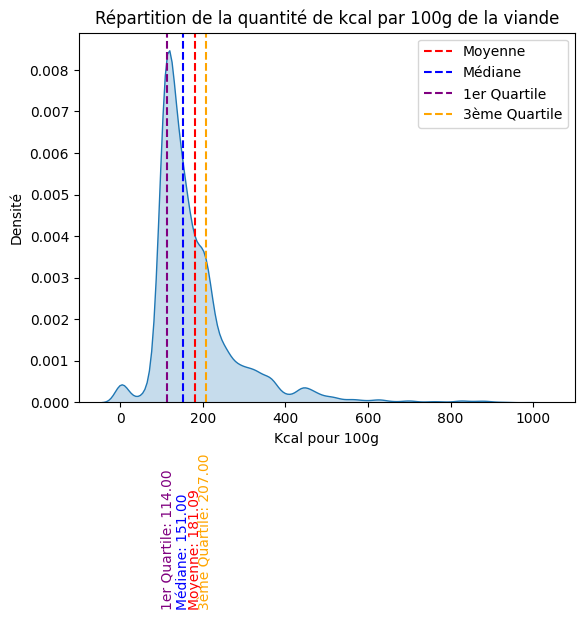

Ecart type: 108.70
Coefficient de variation: 0.60, cela montre qu'il y a une grande variabilité par rapport à la moyenne.
Ce que nous pouons voir sur le graphique, l'étendue des données est très grande, bien que concentrée.


In [11]:
df_meat = df[df['pnns_groups_2']=='Meat']

counts = df_meat['nutriscore_grade'].value_counts().to_frame().reset_index()
counts.columns = ['nutriscore_grade', 'count']
print("Nombre de produits par nutriscore")
display(counts)

print("Moyenne des valeurs nutritionnelles + le nutriscore_score pour la viande.")
meat_numerical = df_meat.select_dtypes(include=['float64'])
meat_means = meat_numerical.mean()
display(meat_means.to_frame().transpose())

print("Les viandes sont globalement riches en proétines, et en calories. Faibles dans quasi toutes les autres. Nous allons regarder quelle est la répartition des calories ici.")

meat_kcal_series = df_meat['energy-kcal_100g']

# Calculation of indicators
mean = meat_kcal_series.mean()
mode = meat_kcal_series.mode()[0]
std = meat_kcal_series.std()
median = meat_kcal_series.median()
q1 = np.percentile(meat_kcal_series, 25)
q3 = np.percentile(meat_kcal_series, 75)
var_coef = meat_kcal_series.std()/meat_kcal_series.mean()

# Plot
sns.kdeplot(meat_kcal_series, fill=True)

plt.axvline(mean, color='red', linestyle='--', label='Moyenne')
plt.axvline(median, color='blue', linestyle='--', label='Médiane')
plt.axvline(q1, color='purple', linestyle='--', label='1er Quartile')
plt.axvline(q3, color='orange', linestyle='--', label='3ème Quartile')

# Add text labels for the numeric values of each line
plt.text(mean, -0.005, f"Moyenne: {mean:.2f}", rotation=90, va='bottom', ha='center', color='red')
plt.text(median, -0.005, f"Médiane: {median:.2f}", rotation=90, va='bottom', ha='center', color='blue')
plt.text(q1, -0.005, f"1er Quartile: {q1:.2f}", rotation=90, va='bottom', ha='center', color='purple')
plt.text(q3, -0.005, f"3ème Quartile: {q3:.2f}", rotation=90, va='bottom', ha='center', color='orange')


# Set the axis labels and title
plt.xlabel("Kcal pour 100g")
plt.ylabel("Densité")
plt.title("Répartition de la quantité de kcal par 100g de la viande")

# Add a legend and show the plot
plt.legend()
plt.show()
print(f"Ecart type: {std:.2f}")
print(f"Coefficient de variation: {var_coef:.2f}, cela montre qu'il y a une grande variabilité par rapport à la moyenne.\nCe que nous pouons voir sur le graphique, l'étendue des données est très grande, bien que concentrée.")

#### Boîte à moustaches

Nous pouvons retrouver ces informations avec un graphique plus digeste, la boîte à moustaches.


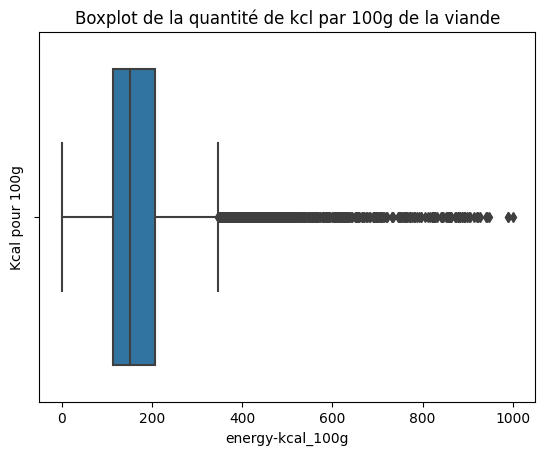

In [12]:
print("Nous pouvons retrouver ces informations avec un graphique plus digeste, la boîte à moustaches.")
sns.boxplot(x=meat_kcal_series, orient="h")

plt.ylabel("Kcal pour 100g")
plt.title("Boxplot de la quantité de kcl par 100g de la viande")

plt.show()

In [13]:
meat_grouped_by_grade = df_meat.groupby('nutriscore_grade')[['nutriscore_score', 'fat_100g', 'saturated-fat_100g', 'fiber_100g', 'sugars_100g', 'energy-kcal_100g']].mean()
meat_grouped_by_grade_style = meat_grouped_by_grade.style.background_gradient(cmap='RdYlGn_r', axis=0).format("{:.2f}")

display(meat_grouped_by_grade_style)

print("Nous voyons que les valeurs correspondent à l'idée reçue. Dans la catégorie des viandes, les fibres sont très peu présentes et n'ont que très peu d'incidence.\nNéanmoins, alors qu'on aurait pu penser le contraire ou que cela n'intervienne pas, le sucre est présent dans les viandes.\nCela peut être signe de la présence de plats préparés dans nos ingrédients.")
print("Le nutriscore_score et le nombre de kcal pour 100g semblent être corrélés. Nous allons essayer de le prouver grâce à une analyse bivariée.")

,nutriscore_score,fat_100g,saturated-fat_100g,fiber_100g,sugars_100g,energy-kcal_100g
nutriscore_grade,,,,,,
a,-3.12,3.20,0.97,0.65,0.32,116.20
b,0.91,6.61,1.94,0.66,0.57,170.62
c,4.05,9.04,2.88,0.68,0.77,172.93
d,13.34,13.61,5.05,0.70,1.21,240.15
e,21.66,28.50,12.26,0.66,2.19,357.11


Nous voyons que les valeurs correspondent à l'idée reçue. Dans la catégorie des viandes, les fibres sont très peu présentes et n'ont que très peu d'incidence.
Néanmoins, alors qu'on aurait pu penser le contraire ou que cela n'intervienne pas, le sucre est présent dans les viandes.
Cela peut être signe de la présence de plats préparés dans nos ingrédients.
Le nutriscore_score et le nombre de kcal pour 100g semblent être corrélés. Nous allons essayer de le prouver grâce à une analyse bivariée.


#### Analyse bivariée entre le nutriscore_score et le nutriscore_grade pour la viande

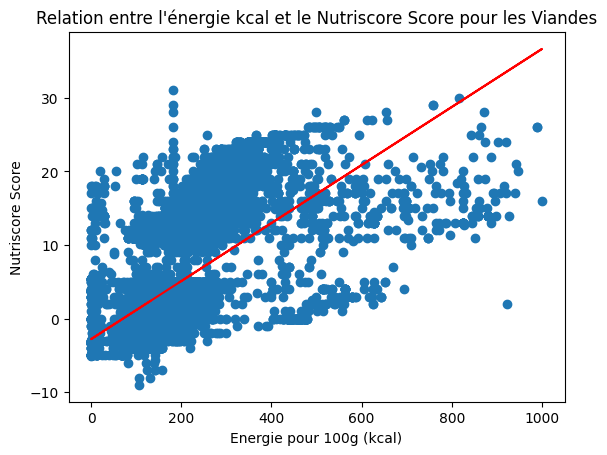

Le coefficient est de :  0.58 ce qui montre qu'il y a une corrélation entre le nutriscore_score et le nombre de kcal.


In [14]:
plt.scatter(df_meat['energy-kcal_100g'], df_meat['nutriscore_score'])

plt.xlabel("Energie pour 100g (kcal)")
plt.ylabel("Nutriscore Score")
plt.title("Relation entre l'énergie kcal et le Nutriscore Score pour les Viandes")

# Droite de régression
coefficients = np.polyfit(df_meat['energy-kcal_100g'], df_meat['nutriscore_score'], 1)
slope = coefficients[0]
y_intercept = coefficients[1]
x = df_meat["energy-kcal_100g"]
plt.plot(x, slope*x + y_intercept, color='red')

plt.show()
corr_matrix = df[['energy-kcal_100g', 'nutriscore_score']].corr()
pearson_coef = corr_matrix.iloc[0,1]

print(f"Le coefficient est de :  {round(pearson_coef,2)} ce qui montre qu'il y a une corrélation entre le nutriscore_score et le nombre de kcal.")

### ANOVA
La logique voudrait que le nutriscore se dégrade en même temps que la teneur en graisses d'un produit. \
Nous allons vérifier cela grâce à l'ANOVA pour répondre à la question suivante : \
Y-a-t-il une teneur en graisse `fat_100g` différente en fonction du `nutriscore_grade` ?\

Représentons d'abord la moyenne par classe de nutriscore : 

In [15]:
means = df.groupby("nutriscore_grade")["fat_100g"].mean()
print(f"{means}\n")

nutriscore_grade
a     3.889531
b     4.313796
c     9.580382
d    16.170725
e    27.168735
Name: fat_100g, dtype: float64



Nous pouvons voir qu'une corrélation semble exister. Utilisons maintenant le modèle ANOVA pour vérifier cette corrélation.

In [16]:
X = "nutriscore_grade" # qualitative
Y = "fat_100g" # quantitative

sous_echantillon = df[df[Y] < 0] # On ne garde que les dépenses

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(df[X],df[Y])

0.21526210011404223

Ce résultat de 0.21 comme éta carré laisse penser qu'il y a effectivement une corrélation entre la classe de nutriscore et la teneur en gras.

### Analyse par Composantes Principales

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

columns = ['nutriscore_score', 'fiber_100g', 'proteins_100g', 'energy-kcal_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'sodium_100g']
df_ACP = df[columns]
df_ACP.describe()

scaler = StandardScaler()
scaler.fit(df_ACP)
df_ACP_scaled = scaler.transform(df_ACP)
df_ACP_scaled = pd.DataFrame(df_ACP_scaled)
df_ACP_scaled.describe().round(2)


,nutriscore_score,fiber_100g,proteins_100g,energy-kcal_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
3,-5.00,0.565595,10.0,57.0,3.9,0.2,0.10,0.036
4,13.91,3.823884,7.8,375.0,15.0,7.0,3.08,0.560
12,8.39,3.823884,0.2,21.0,0.4,0.0,0.00,0.816
13,3.65,3.823884,2.0,60.0,3.0,3.0,1.00,0.460
20,9.00,0.390807,0.2,63.0,15.5,0.0,0.00,0.000


#### PCA

In [46]:
n_components=7
pca = PCA(n_components=n_components)
pca.fit(df_ACP_scaled)


PCA(n_components=7)

7


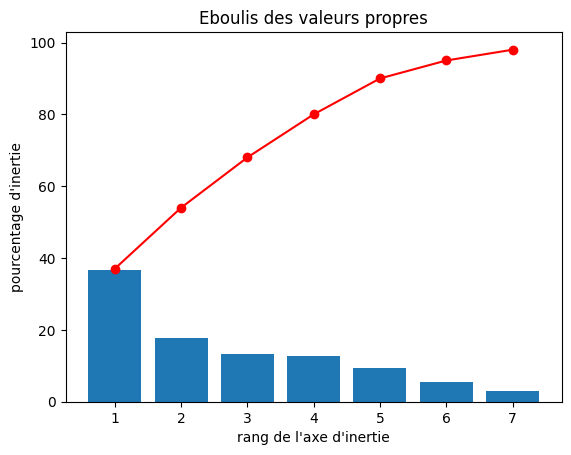

On peut voir que 80% de la variance est comprise dans les 4 premières composantes.


In [55]:
pca.explained_variance_ratio_
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)
x_list = list(x_list)
print(len(x_list))

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)
print("On peut voir que 80% de la variance est comprise dans les 4 premières composantes.")

In [63]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs
pcs.columns = columns
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,nutriscore_score,fiber_100g,proteins_100g,energy-kcal_100g,sugars_100g,fat_100g,saturated-fat_100g,sodium_100g
F1,0.47,0.04,0.10,0.51,0.16,0.50,0.48,0.02
F2,-0.23,0.01,0.59,-0.02,-0.71,0.21,0.13,0.20
F3,-0.19,0.86,0.18,0.18,0.08,-0.02,-0.11,-0.39
F4,0.19,0.37,0.08,-0.01,0.18,-0.17,-0.13,0.86
F5,-0.20,0.27,-0.76,-0.06,-0.38,0.32,0.19,0.17
F6,0.38,0.21,0.04,-0.58,-0.09,-0.32,0.59,-0.14
F7,-0.69,-0.07,0.09,0.02,0.42,-0.06,0.55,0.16


In [62]:
pcs.T

,F1,F2,F3,F4,F5,F6,F7
nutriscore_score,0.468336,-0.225842,-0.187573,0.185270,-0.198154,0.378050,-0.691032
fiber_100g,0.038044,0.011544,0.857940,0.374777,0.265586,0.209166,-0.073533
proteins_100g,0.103247,0.587638,0.175414,0.081269,-0.757787,0.043090,0.088411
energy-kcal_100g,0.510801,-0.018235,0.176974,-0.012409,-0.056202,-0.583064,0.016145
sugars_100g,0.161863,-0.709555,0.081540,0.184366,-0.383349,-0.091399,0.419329
fat_100g,0.496859,0.207584,-0.016201,-0.166202,0.319430,-0.318349,-0.057862
saturated-fat_100g,0.484020,0.128631,-0.107158,-0.134373,0.186074,0.586040,0.552106
sodium_100g,0.017099,0.200267,-0.385060,0.859528,0.170830,-0.135517,0.158067


<Axes: >

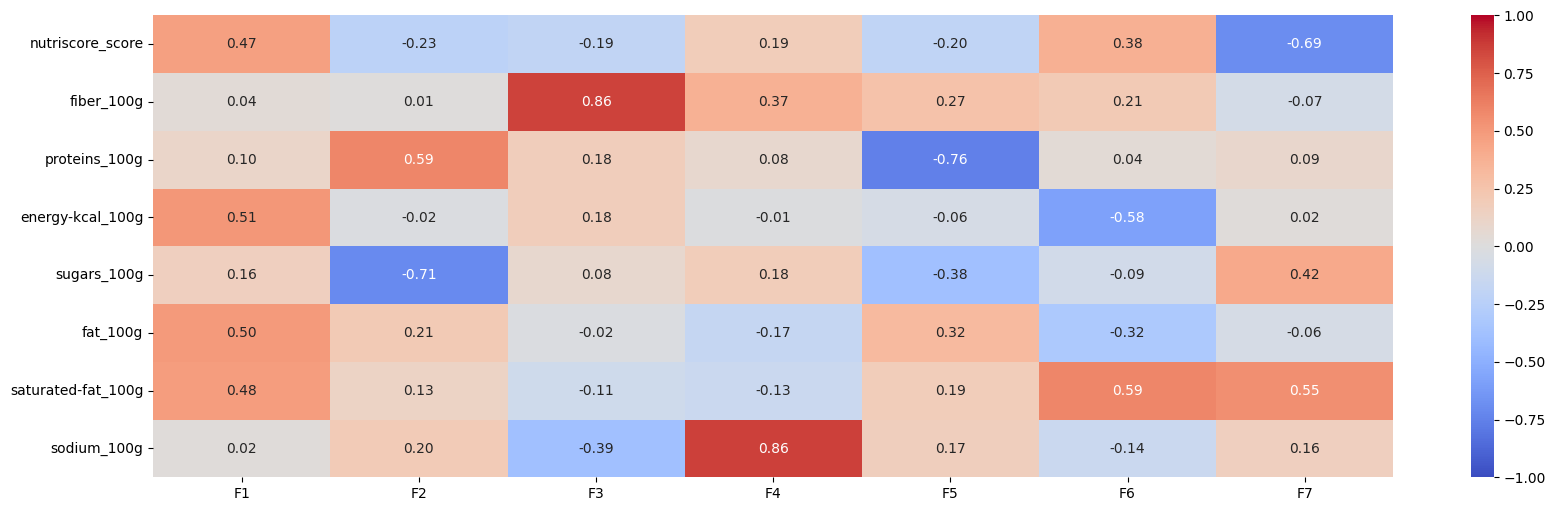

In [64]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [67]:
x, y = 0,1

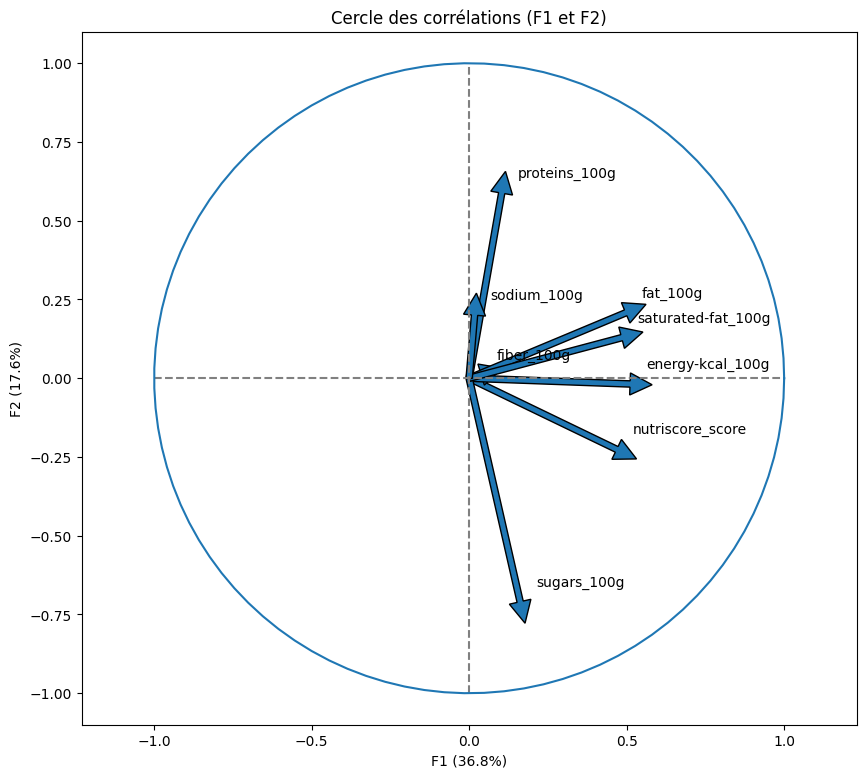

In [68]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             columns[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

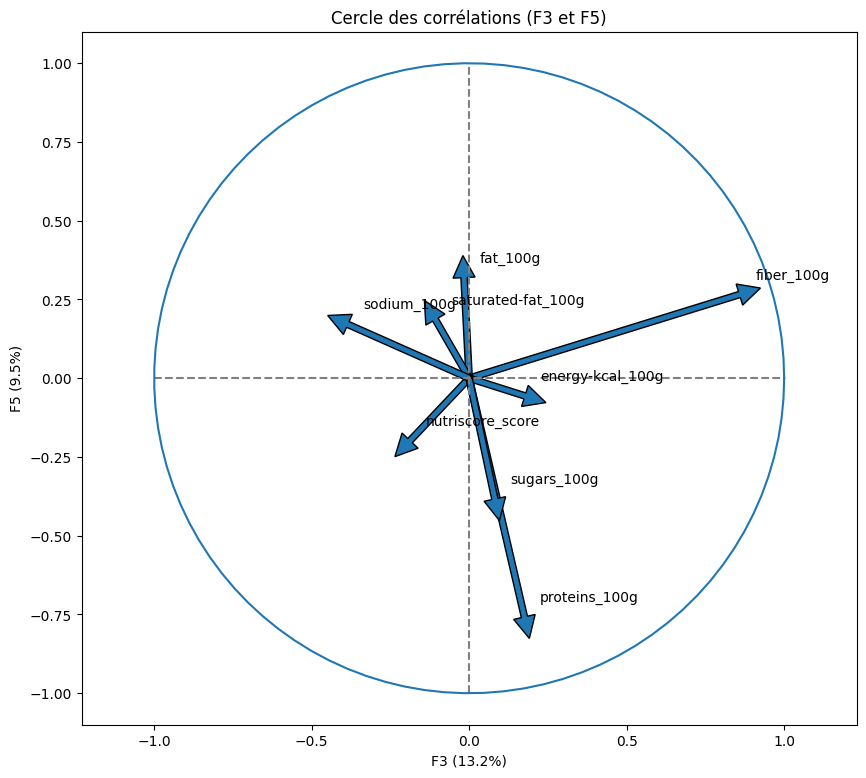

In [89]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
  
x_y = (2,4)
correlation_graph(pca, x_y, columns)

In [79]:
X_proj = pca.transform(df_ACP)

/home/degregor69/.local/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [80]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

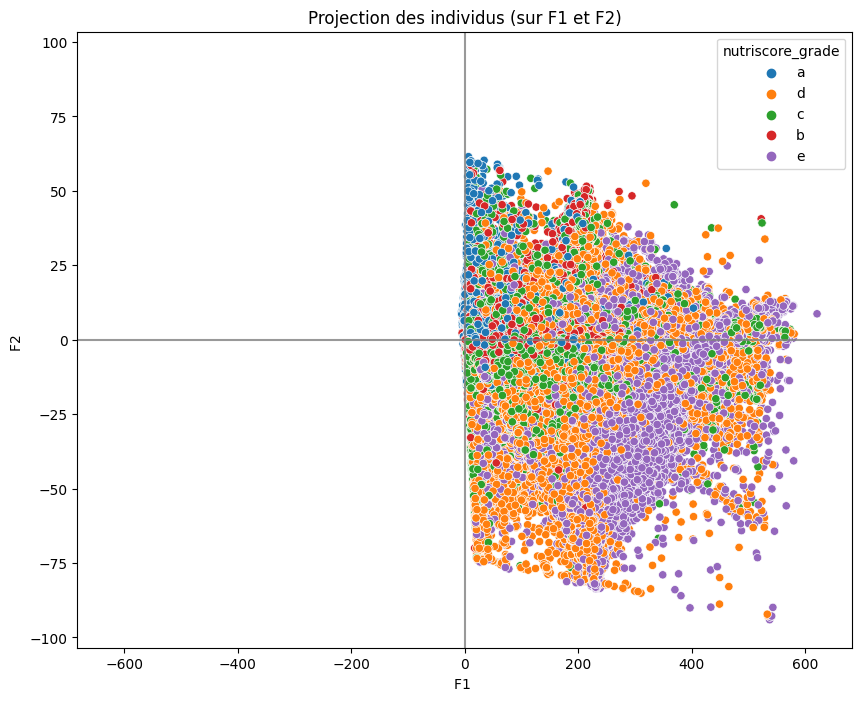

In [83]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=df['nutriscore_grade'])

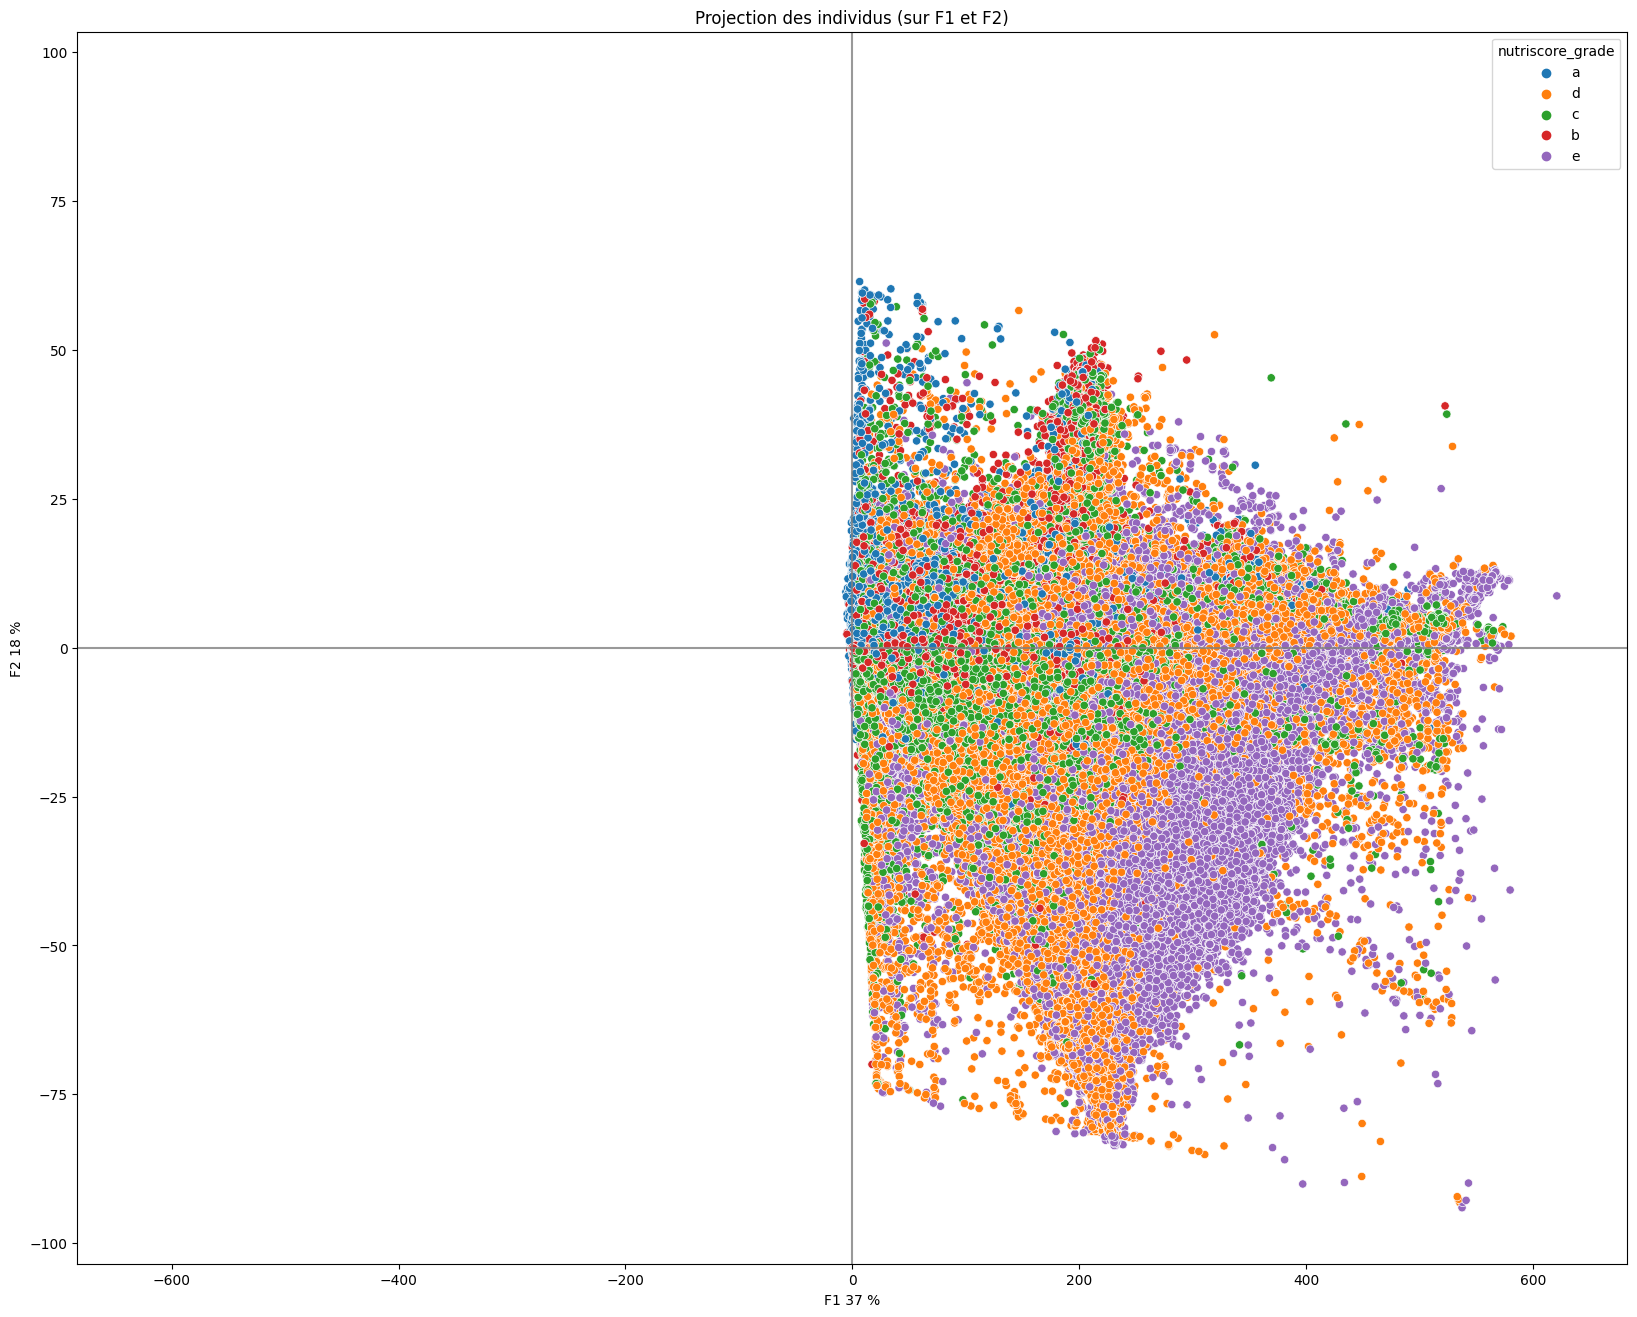

In [86]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, figsize=(20,16), clusters=df['nutriscore_grade'], marker="o")

## Comment améliorer les données pour Nutriwise.io
### Calcul d'un eco-score
L'éco-score n'est que très peu présent et difficilement calculable avec ce dataset.\
Il s'agit de quelque chose de très difficile à calculer puisque cela a de multiples facteurs : 

* Le lieu de fabrication du produit
* Le lieu de fabrication des ingrédients du produit lorsqu'il s'agit d'un plat préparé
* La quantité de ressources utilisée pour fabriquer le produit, qui peut aussi dépendre du lieu de fabrication
* Les ingrédients, leur origine et leur propre fabrication
* La distance entre le lieu de fabrication/cueille/élevage et le lieu de ventes
* Le moyen de transport utilisé

Faire tenir cette information dans un score est déjà compliqué, mais obtenir toutes ces données en est encore une autre. Avec le jeu d'OpenFoodFacts, ce n'est pas possible pour l'instant.\
Il faudrait une très grande transparence des producteurs et industriels pour arriver à quelque chose de cohérent.

### Une distinction produits bruts et produits transformés
Dans le cadre de nutriwise.io, il serait plausible d'être capable de donner à la fois des alternatives brutes et transformées.\
Dans notre cas, un besoin en courgettes pourrait se matérialiser par une poêlée de courgettes cuisinée surgelée, alors que le meilleur ingrédient serait une courgette brute.
OpenFoodFacts se base sur des produits ayant un code-barres, néanmoins, il serait peut-être judicieux de réussir à entrer en base de données les produits bruts. Leur nombre ne doit pas être si élevé et les informations nutritionnelles facilement trouvables sur internet en croisant plusieurs sources. Cela représente un travail, mais qui peut peut-être être automatisé.